In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D


%matplotlib notebook

In [ ]:
print(state_on['torque']['right_s1'][:20])

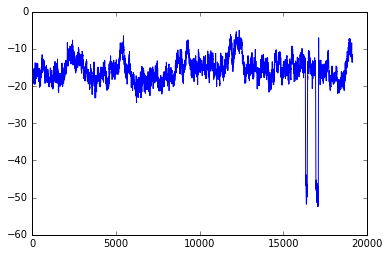

Average errors: 

[0, 0, 0]


In [3]:
pkl_file = open('../anthony/data/physical/random_walks/random_walk_20.pkl', 'rb')
vicon_1, state_1, _, _, error_1, average_error_1 = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(state_1['torque']['right_s1'])
plt.show()


In [ ]:
pkl_file = open('../anthony/data/physical/circle_supervised_off_0.pkl', 'rb')
vicon_2, state_2, _, _, error_2, average_error_2 = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(error_2[100:-100])
plt.ylabel('meters')
plt.title('World frame end effector position error: Compensation off')
plt.legend(['x', 'y', 'z'])
plt.legend(['x', 'y', 'z'])
plt.xlabel('index')


plt.show()

print("Average errors: \n")
print(average_error_2)

In [ ]:
pkl_file = open('../anthony/data/physical/circle_supervised_off_1.pkl', 'rb')
vicon_3, state_3, _, _, error_3, average_error_3 = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(error_3[100:-100])
plt.ylabel('meters')
plt.title('World frame end effector position error: Compensation off')
plt.legend(['x', 'y', 'z'])
plt.legend(['x', 'y', 'z'])
plt.xlabel('index')


plt.show()

print("Average errors: \n")
print(average_error_3)

In [ ]:
pkl_file = open('../anthony/data/physical/circle_supervised_off_2.pkl', 'rb')
vicon_4, state_4, _, _, error_4, average_error_4 = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(error_4[100:-100])
plt.ylabel('meters')
plt.title('World frame end effector position error: Compensation off')
plt.legend(['x', 'y', 'z'])
plt.legend(['x', 'y', 'z'])
plt.xlabel('index')


plt.show()

print("Average errors: \n")
print(average_error_4)

In [ ]:
#plot for desired trajectory vs. executed trajectory without gravity compensation

end_effector_fig = plt.figure()
# end_effector_fig.add_subplot(111)
ax = end_effector_fig.add_subplot(111, projection='3d')
ax.plot(np.array(vicon_1)[100:-100,0], np.array(vicon_1)[100:-100,1], np.array(vicon_1)[100:-100,2], color = 'b')
plt.ylabel('meters')
plt.title('World frame end effector position: Desired vs. Performed', y=1.08)
# plt.legend(['x', 'y', 'z'])
# ax = end_effector_fig.add_subplot(212, projection='3d')
ax.plot(np.array(vicon_2)[100:-100,0], np.array(vicon_2)[100:-100,1], np.array(vicon_2)[100:-100,2], color = 'r')
plt.ylabel('meters')
# plt.title('World frame end effector position: Compensation off')
plt.legend(['Executed (with compensation)', 'Executed (no compensation)'], loc=3)
plt.show()

In [ ]:
# print(vicon_on)

vicon_on_np = np.array(vicon_on)

print(vicon_on_np)

In [ ]:
pkl_file = open('../anthony/data/gazebo/programmed_sine_1.pkl', 'rb')
vicon_1, state_1, _, _, _ = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(np.array(state_1['theta_measure']['right_e1'])[100:-100])
plt.plot(np.array(state_1['theta_command']['right_e1'])[100:-100], color='red')

plt.xlabel('index')


plt.show()

print("Average errors: \n")
# print(average_error_1)

In [ ]:
pkl_file = open('../anthony/data/gazebo/programmed_sine_off_2.pkl', 'rb')
vicon_2, state_2, _, _, _ = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(np.array(state_2['theta_measure']['right_s1'])[:])
plt.plot(np.array(state_2['theta_command']['right_s1'])[:], color='red')

plt.xlabel('index')


plt.show()

print("Average errors: \n")
# print(average_error_1)

In [ ]:
pkl_file = open('../anthony/data/physical/right_s1_OFF_2.pkl', 'rb')
vicon_3, state_3, _, _, _, _ = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(np.array(state_3['theta_measured']['right_s1'])[:])
plt.plot(np.array(state_3['theta_commanded']['right_s1'])[:], color='red')

plt.xlabel('index')

vicon_fig = plt.figure()
vicon_fig.add_subplot(111)
plt.plot(np.array(vicon_3)[:,0])


plt.show()

print("Average errors: \n")
# print(average_error_1)

In [4]:
class OrnsteinUhlenbeckProcess(object):
    def __init__(self, dimension, num_steps, theta=0.15, mu=0, sigma=0.3, dt=0.01):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dimension = dimension
        self.dt = dt
        self.num_steps = num_steps
        self.counter = 0
        self.reset()

    def step(self):
        #scale = np.exp(-self.counter * 2.3 / self.num_steps)
        self.x = self.x + self.theta*(self.mu-self.x)*self.dt + self.sigma*np.sqrt(self.dt)*np.random.randn(self.dimension)# * scale
        return self.x

    def reset(self):
        self.x = np.zeros(self.dimension)
        #self.counter += 1

In [ ]:
test = OrnsteinUhlenbeckProcess(dimension=6, num_steps=500000)

vec = np.array(test.x)

for i in range(test.num_steps):
    test.step()
    vec = np.vstack([vec, test.x])

In [11]:
np.abs(vec).max()

2.1784344003503637

<IPython.core.display.Javascript object>


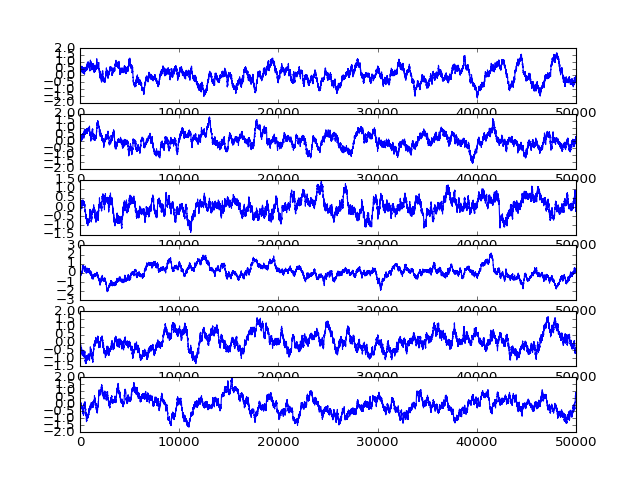

In [7]:
random_walk = plt.figure()
for i in range(6):
    random_walk.add_subplot(6, 1, i+1)
    plt.plot(vec[:, i])
    
plt.show()

In [ ]:
print(np.max(vec, 0))
print(np.min(vec, 0))